# Quickstart

In [1]:
import sys
#sys.path.insert(0, "/opt/simtool")
sys.path.insert(0, "/home/nanohub/mmh/simtool")
from simtool import Run, get_inputs, get_outputs
import numpy as np

In [2]:
# specify a local simtool
#nb = 'test_simtool/test_simtool.ipynb'

# use the installed one
nb = 'test_simtool'

## Setting Inputs

In [3]:
# get the list of inputs for the simtool.
inputs = get_inputs(nb)
inputs

some_text:
    desc: Text to Write in Output Image
    type: Text
    maxlen: 20
    value: Default Text

volts:
    desc: Value to Write in Output Image
    type: Number
    units: millivolt
    max: 1000
    value: 0

width:
    desc: Width of Output Image in pixels
    type: Integer
    min: 100
    max: 2000
    value: 400

height:
    desc: Height of Output Image in pixels
    type: Integer
    min: 50
    max: 1000
    value: 200

position:
    desc: Position of text in image [x, y] in pixels
    type: List
    value: [20, 20]

options:
    desc: Color and Font Size Options.
    type: Dict
    value: {'FontSize': 28, 'FontColor': 'red', 'Background': 'black'}

myarray:
    type: Array
    dim: 1

In [4]:
# get the outputs, if we are curious
get_outputs(nb)

volts:
    desc: Input 'volts' returned from SimTool
    type: Number
    units: millivolt

myarray:
    desc: The array that was input, doubled.
    type: Array

PNG:
    desc: Image as a PNG
    type: Image

JPG:
    desc: Image as a JPG
    type: Image

GIF:
    desc: Image as a GIF
    type: Image

nanohub:
    desc: Our logo!
    type: Image

In [5]:
# set the input array
inputs.myarray.value = np.array([[1, 2.0, 3.14],[4,5,6]])

In [6]:
# check the input volts
inputs.volts

    desc: Value to Write in Output Image
    type: Number
    units: millivolt
    max: 1000
    value: 0

In [7]:
# try setting it to something bad.  it will fail
#inputs.volts.value = '20g'
inputs.volts.value = 20
inputs.volts

    desc: Value to Write in Output Image
    type: Number
    units: millivolt
    max: 1000
    value: 20

In [8]:
# use units, if you want
inputs.volts.value = '.082 V'
inputs.volts.value

82.0

## Running the Simtool

In [9]:
# Do a single run with those inputs
# Default is to put the run in RUNS/uuid.
#r = Run(nb, inputs, cache=False)
#r = Run(nb, inputs, cache=False, venue='local')
r = Run(nb, inputs, cache=False, venue='submit')

cmd= submit -i images anaconda-6_papermill -f inputs.yaml test_simtool.ipynb test_simtool.ipynb


## Visualizing the Outputs

In [10]:
# we can see the inputs used
r.inputs.myarray.value

[[1.0, 2.0, 3.14], [4.0, 5.0, 6.0]]

In [11]:
r.inputs.volts.value

82.0

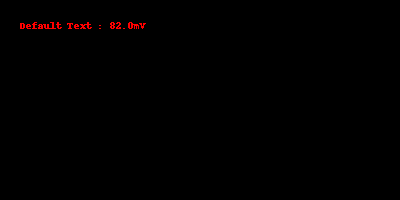

In [12]:
# output database is accessed from the Run object
db = r.db
db.read('PNG')

In [13]:
# see raw results database
db.nb.scrap_dataframe

,name,data,encoder,display,filename
0,volts,82.0,text,None,test_simtool.ipynb
1,myarray,"{""py/reduce"": [{""py/function"": ""numpy.core.mul...",text,None,test_simtool.ipynb
2,PNG,file://foo.png,text,None,test_simtool.ipynb
3,JPG,"{""py/object"": ""PIL.Image.Image"", ""py/state"": [...",text,None,test_simtool.ipynb
4,GIF,file://foo.gif,text,None,test_simtool.ipynb
5,nanohub,file://images/nanohub.png,text,None,test_simtool.ipynb


In [14]:
# where is my output?  either of these work
print(db.dir)
print(r.outdir)

RUNS/48c2f306e9414524955ff6d8e6b5b6e4
RUNS/48c2f306e9414524955ff6d8e6b5b6e4


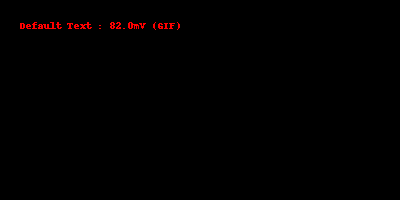

In [15]:
db.read('GIF')

In [16]:
db.read('volts')

82.0

In [17]:
db.read('myarray')

array([[ 4.1  ,  8.2  , 12.874],
       [16.4  , 20.5  , 24.6  ]])

In [18]:
x = db.read('JPG')

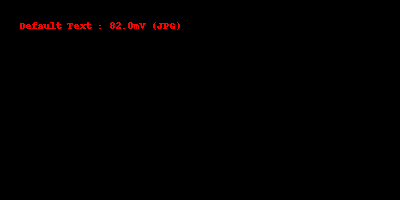

In [19]:
x

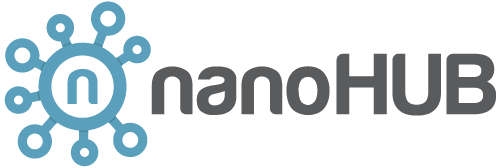

In [20]:
hublogo = db.read('nanohub', display=True)

<class 'PIL.PngImagePlugin.PngImageFile'>


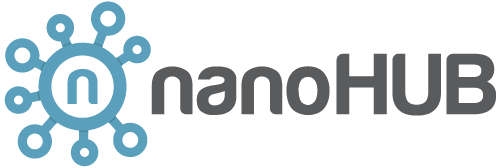

In [21]:
print(type(hublogo))
hublogo

## Extras

In [22]:
# cell execution stats
db.nb.papermill_metrics

,filename,cell,value,type
1,test_simtool.ipynb,Out [1],11.020410,time (s)
2,test_simtool.ipynb,Out [2],0.026727,time (s)
3,test_simtool.ipynb,Out [3],0.018060,time (s)
4,test_simtool.ipynb,Out [4],0.015260,time (s)
5,test_simtool.ipynb,Out [5],0.015025,time (s)
7,test_simtool.ipynb,Out [6],0.018299,time (s)
8,test_simtool.ipynb,Out [7],0.018890,time (s)
9,test_simtool.ipynb,Out [8],0.023691,time (s)
10,test_simtool.ipynb,Out [9],0.101506,time (s)
11,test_simtool.ipynb,Out [10],0.036276,time (s)


In [23]:
# notebook metadata
r.db.nb.metadata

{'celltoolbar': 'Tags',
 'kernelspec': {'display_name': 'Python 3',
  'language': 'python',
  'name': 'python3'},
 'language_info': {'codemirror_mode': {'name': 'ipython', 'version': 3},
  'file_extension': '.py',
  'mimetype': 'text/x-python',
  'name': 'python',
  'nbconvert_exporter': 'python',
  'pygments_lexer': 'ipython3',
  'version': '3.7.3'},
 'papermill': {'duration': 15.101523,
  'end_time': '2019-08-29T17:11:27.534645',
  'environment_variables': {},
  'exception': None,
  'input_path': './test_simtool.ipynb',
  'output_path': './test_simtool.ipynb',
  'parameters': {'height': 200,
   'myarray': [[1.0, 2.0, 3.14], [4.0, 5.0, 6.0]],
   'options': {'Background': 'black', 'FontColor': 'red', 'FontSize': 28},
   'position': [20, 20],
   'some_text': 'Default Text',
   'volts': 82.0,
   'width': 400},
  'start_time': '2019-08-29T17:11:12.433122',
  'version': '1.1.0'}}

In [24]:
# for debugging, the inputs as passed to papermill
r.input_dict

{'some_text': 'Default Text',
 'volts': 82.0,
 'width': 400,
 'height': 200,
 'position': [20, 20],
 'options': {'FontSize': 28, 'FontColor': 'red', 'Background': 'black'},
 'myarray': [[1.0, 2.0, 3.14], [4.0, 5.0, 6.0]]}